# Trabalho 1° de Mineração de Dados

## Movies on Netflix, Prime Video, Hulu and Disney+
### A collection of movies found on these streaming platforms


### Alunos

**Nome: Natanael Moreira de lemos - Matricula: 398447**  
**Nome: Ramiro Campos de Castro - Matricula: 400723**

## Perguntas Sobre o dataset

* Média de idade por cada plataforma ou por filme
* Média Imdb por país ou plataforma
* Média do Rotten Tomatoes
* Classificação de idade dos filmes em cada plataforma
* Diretor com mais filmes em cada plataforma
* Linguagem dos filmes
* Filmes com maior duração ou menor duração
* Qual plataforma tem mais séries ou filmes
* Gênero de filme mais popular
* Qual pais tem mais locação de filmes
* Qual plataforma possui mais disponibilidade de filmes 
* Ou Qual plataforma tem mais filmes 





# <span style="color:green"> 1. Importando as Bibliotecas, lendo os DataSets</span>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sidetable

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data_movies = pd.read_csv("MoviesOnStreamingPlatforms_updated.csv")
data_series = pd.read_csv("tv_shows.csv")

In [4]:
data_series.rename(columns={'Unnamed: 0': 'ID', 'type': 'Type'},inplace=True)
numMovies = len(data_movies.index)
numSeries = len(data_series.index)
data_series['ID']=data_series.apply(lambda x: x['ID']+numMovies+1,axis=1) 

# <span style="color:green"> 2. Vendo informações sobre os DataSets </span>

In [5]:
data_movies.head(5)

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [6]:
data_series.head(5)

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,16745,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,16746,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,16747,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,16748,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,16749,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1


In [9]:
data_movies.describe()

,Unnamed: 0,ID,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,Type,Runtime
count,16744.000000,16744.000000,16744.000000,16173.000000,16744.000000,16744.000000,16744.000000,16744.000000,16744.0,16152.000000
mean,8371.500000,8372.500000,2003.014035,5.902751,0.212613,0.053930,0.737817,0.033684,0.0,93.413447
std,4833.720789,4833.720789,20.674321,1.347867,0.409169,0.225886,0.439835,0.180419,0.0,28.219222
min,0.000000,1.000000,1902.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
25%,4185.750000,4186.750000,2000.000000,5.100000,0.000000,0.000000,0.000000,0.000000,0.0,82.000000
50%,8371.500000,8372.500000,2012.000000,6.100000,0.000000,0.000000,1.000000,0.000000,0.0,92.000000
75%,12557.250000,12558.250000,2016.000000,6.900000,0.000000,0.000000,1.000000,0.000000,0.0,104.000000
max,16743.000000,16744.000000,2020.000000,9.300000,1.000000,1.000000,1.000000,1.000000,0.0,1256.000000


In [7]:
#Valores nulos

data_movies.isnull().sum()

Unnamed: 0             0
ID                     0
Title                  0
Year                   0
Age                 9390
IMDb                 571
Rotten Tomatoes    11586
Netflix                0
Hulu                   0
Prime Video            0
Disney+                0
Type                   0
Directors            726
Genres               275
Country              435
Language             599
Runtime              592
dtype: int64

In [8]:
data_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16744 entries, 0 to 16743
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       16744 non-null  int64  
 1   ID               16744 non-null  int64  
 2   Title            16744 non-null  object 
 3   Year             16744 non-null  int64  
 4   Age              7354 non-null   object 
 5   IMDb             16173 non-null  float64
 6   Rotten Tomatoes  5158 non-null   object 
 7   Netflix          16744 non-null  int64  
 8   Hulu             16744 non-null  int64  
 9   Prime Video      16744 non-null  int64  
 10  Disney+          16744 non-null  int64  
 11  Type             16744 non-null  int64  
 12  Directors        16018 non-null  object 
 13  Genres           16469 non-null  object 
 14  Country          16309 non-null  object 
 15  Language         16145 non-null  object 
 16  Runtime          16152 non-null  float64
dtypes: float64(2

# <span style="color:green">3. Limpando alguns dados dos DataSets</span>

In [9]:
## Limpeza na coluna de idade

for i in range(len(data_movies['Age'])):
    aux = data_movies.loc[i,'Age']
    if aux != np.nan or aux != 'all' or aux != '':
        aux = str(aux)
        if '+' in aux:
            data_movies.loc[i,'Age'] = aux.strip().split('+')[0]
                        

In [10]:
## Limpeza na coluna do Rotten Tomatoes no Filmes

for i in range(len(data_movies['Rotten Tomatoes'])):
        aux = data_movies.loc[i,'Rotten Tomatoes']
        if aux != np.nan or aux != '':
            aux = str(aux)
            if '%' in aux:
                data_movies.loc[i,'Rotten Tomatoes'] = aux.strip().split('%')[0]              

In [11]:
## Deixa os valores de 0 a 10                
data_movies['Rotten Tomatoes'] = data_movies['Rotten Tomatoes'].apply(lambda x: float(x)/10)  

In [19]:
data_movies.head(3)

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13,8.8,8.7,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18,8.7,8.7,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13,8.5,8.4,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0


In [17]:
data_series.head(10)

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
0,16745,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,16746,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,16747,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,16748,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,16749,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1
5,16750,The Office,2005,16+,8.9,81%,1,0,0,0,1
6,16751,Black Mirror,2011,18+,8.8,83%,1,0,0,0,1
7,16752,Supernatural,2005,16+,8.4,93%,1,0,0,0,1
8,16753,Peaky Blinders,2013,18+,8.8,92%,1,0,0,0,1
9,16754,Avatar: The Last Airbender,2005,7+,9.2,100%,1,0,0,0,1


# <span style="color:red">4. Juntando os 2 DataSets</span>

In [16]:
colunas = []

for col in data_series.columns:
    colunas.append(col)
print("Colunas em comum dos 2 DataSets:\n",colunas)
data_all = pd.concat([data_movies[colunas],data_series], axis=0)
data_all.index = data_all["ID"]
# data_all é o data frame com todos as séries e filmes

Colunas em comum dos 2 DataSets:
 ['ID', 'Title', 'Year', 'Age', 'IMDb', 'Rotten Tomatoes', 'Netflix', 'Hulu', 'Prime Video', 'Disney+', 'Type']


In [30]:
data_all

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type
ID,,,,,,,,,,,
1,1,Inception,2010,13,8.8,8.7,1,0,0,0,0
2,2,The Matrix,1999,18,8.7,8.7,1,0,0,0,0
3,3,Avengers: Infinity War,2018,13,8.5,8.4,1,0,0,0,0
4,4,Back to the Future,1985,7,8.5,9.6,1,0,0,0,0
5,5,"The Good, the Bad and the Ugly",1966,18,8.8,9.7,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
22351,22351,Tut's Treasures: Hidden Secrets,2018,NaN,NaN,NaN,0,0,0,1,1
22352,22352,Paradise Islands,2017,NaN,NaN,NaN,0,0,0,1,1
22353,22353,Wild Russia,2018,NaN,NaN,NaN,0,0,0,1,1


# <span style="color:green">5. Informações sobre os Títulos das plataformas</span>

### 5.1 Contagem de idade dos Títulos 

In [17]:
data_movies_age = data_movies[(data_movies['Age'] != 'all') | (data_movies['Age'] != np.nan)]
data_series_age = data_series[(data_series['Age'] != 'all') | (data_series['Age'] != np.nan)]

In [18]:
order = ['7','13','16','18','all']

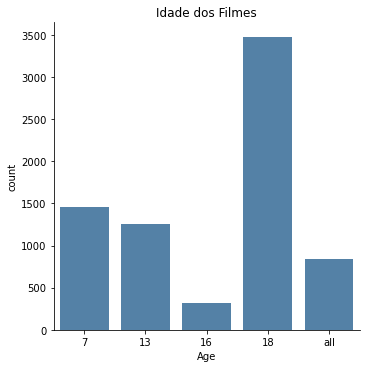

In [19]:
sns.catplot(x="Age", kind="count",color="#4682B4", data=data_movies_age,order=order)
plt.title("Idade dos Filmes")
plt.show()

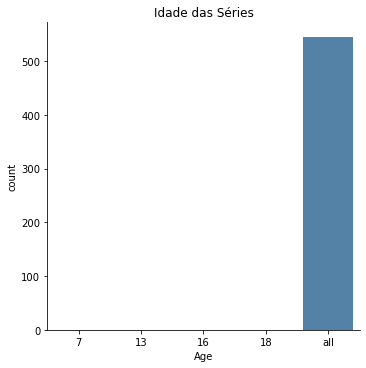

In [20]:
sns.catplot(x="Age", kind="count",color="#4682B4", data=data_series_age,order=order)
plt.title("Idade das Séries")
plt.show()

### 5.2 Titulos com maiores notas no IMDb e no Rotten Tomatoes

In [24]:
data_movies[data_movies['IMDb'] == data_movies['IMDb'].max()][['Title','Year','Directors','Genres','IMDb']].head(5)

,Title,Year,Directors,Genres,IMDb
1292,My Next Guest with David Letterman and Shah Ru...,2019,NaN,Talk-Show,9.3
5110,Love on a Leash,2011,Fen Tian,"Comedy,Drama,Fantasy,Romance",9.3
6566,Square One,2019,Danny Wu,"Documentary,Drama,Music",9.3
6837,Steven Banks: Home Entertainment Center,1989,Tom McLoughlin,Comedy,9.3
7220,"Down, But Not Out!",2015,Miguel Gaudêncio,"Documentary,Sport",9.3


In [25]:
data_movies[data_movies['Rotten Tomatoes'] == data_movies['Rotten Tomatoes'].max()][['Title','Year','Directors','Genres','Rotten Tomatoes']].head(5)

,Title,Year,Directors,Genres,Rotten Tomatoes
11,3 Idiots,2009,Rajkumar Hirani,"Comedy,Drama",10.0
89,The Dawn Wall,2018,"Josh Lowell,Peter Mortimer","Documentary,Biography,Sport",10.0
126,Bad Genius,2017,Nattawut Poonpiriya,"Comedy,Crime,Drama,Thriller",10.0
141,Bill Burr: I'm Sorry You Feel That Way,2014,Jay Karas,Comedy,10.0
148,The Square,2013,Ruben Östlund,"Comedy,Drama",10.0


### 5.3 Idade dos Títulos por Plataforma

In [21]:
# Separação das Plataformas

data_prime = data_movies[data_movies['Prime Video'] == 1].iloc[:,[1,2,3,4,5,6,7,11,12,13,14,15,16]]
data_netflix = data_movies[data_movies['Netflix'] == 1].iloc[:,[1,2,3,4,5,6,8,11,12,13,14,15,16]]
data_hulu = data_movies[data_movies['Hulu'] == 1].iloc[:,[1,2,3,4,5,6,7,9,12,13,14,15,16]]
data_disney = data_movies[data_movies['Disney+'] == 1].iloc[:,[1,2,3,4,5,6,10,11,12,13,14,15,16]]

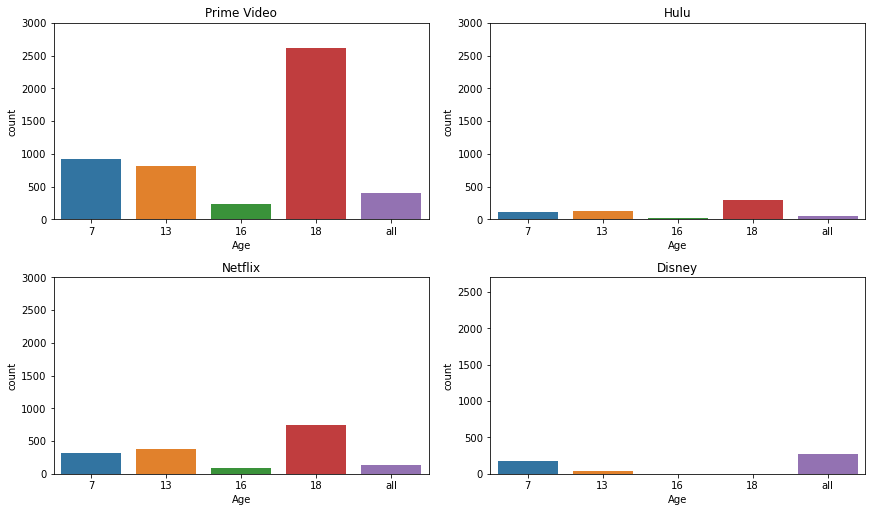

In [22]:
fig,axs = plt.subplots(nrows = 2,ncols = 2,figsize=(12,7),constrained_layout=True)

sns.countplot(x='Age',data=data_prime,ax=axs[0][0],order=order)
axs[0][0].set_title('Prime Video')
axs[0][0].set_ylim(0,3000)

sns.countplot(x='Age',data=data_hulu,ax=axs[0][1],order=order)
axs[0][1].set_title('Hulu')
axs[0][1].set_ylim(0,3000)

sns.countplot(x='Age',data=data_netflix,ax=axs[1][0],order=order)
axs[1][0].set_title('Netflix')
axs[1][0].set_ylim(0,3000)

sns.countplot(x='Age',data=data_disney,ax=axs[1][1],order=order)
axs[1][1].set_title('Disney')
axs[1][1].set_ylim(0,2700)

plt.show()

### 5.4 Porcentagem de Filmes em cada plataforma

In [23]:
labels = 'Netflix','PrimeVideo', 'Hulu','Disney+'
values = {'Netflix':0,'Prime Video':0,'Hulu':0,'Disney+':0}

values['Netflix'] = len(data_movies[data_movies['Netflix'] == 1])
values['Prime Video'] = len(data_movies[data_movies['Prime Video'] == 1])
values['Hulu'] = len(data_movies[data_movies['Hulu'] == 1])
values['Disney+'] = len(data_movies[data_movies['Disney+'] == 1])

sizes = list(values.values())

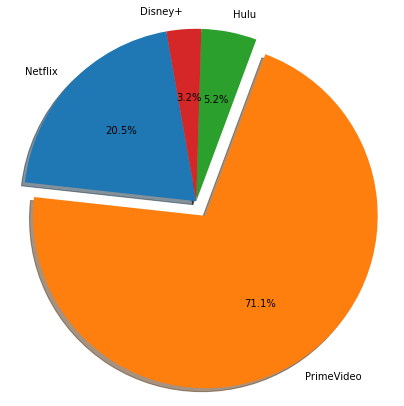

In [24]:
fig, axes = plt.subplots(figsize=(7,7))
explode = (0, 0.1, 0, 0)

axes.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=100)
axes.axis('equal')
plt.show()

## Informações sobre os idiomas dos títulos

### Mais de 66% dos filmes são traduzidos para o inglês

In [30]:
data = data_movies.dropna(axis=0,how='any')
data.stb.freq(['Language'],thresh=90).head(11)

,Language,count,percent,cumulative_count,cumulative_percent
0,English,2196,66.525295,2196,66.525295
1,"English,Spanish",125,3.786731,2321,70.312027
2,"English,French",80,2.423508,2401,72.735535
3,Hindi,55,1.666162,2456,74.401696
4,"English,German",31,0.939109,2487,75.340806
5,"English,Italian",25,0.757346,2512,76.098152
6,Spanish,23,0.696759,2535,76.794911
7,"Hindi,English",22,0.666465,2557,77.461375
8,French,22,0.666465,2579,78.127840
9,Japanese,20,0.605877,2599,78.733717


## Diretores com maior média no IMDb

In [43]:
data_movies[['Title','IMDb','Directors']].groupby(['Directors','Title']).agg(['mean','count']).sort_values(by=('IMDb','mean'), ascending=False).head(10)

IMDb      
                                                                mean count
Directors               Title                                             
Roger Donaldson         Bounty                                   9.3     1
Fen Tian                Love on a Leash                          9.3     1
Danny Wu                Square One                               9.3     1
Miguel Gaudêncio        Down, But Not Out!                       9.3     1
Tom McLoughlin          Steven Banks: Home Entertainment Center  9.3     1
Chris Leslie,Oggi Tomic Finding Family                           9.1     1
Rel Dowdell             Where's Daddy?                           9.1     1
Mahesh Manjrekar        Natsamrat                                9.1     1
Christopher Nolan       The Dark Knight                          9.0     1
Paul Kakert             Escape from Firebase Kate                9.0     1

## Pais com mais conteudo rico, tendo em vista que as plataformas modificam o conteudo de acordo com a localidade

In [61]:
data_movies.stb.freq (['Country'], thresh = 80)[['Country','count','percent']]

,Country,count,percent
0,United States,8776,53.810779
1,India,1064,6.524005
2,United Kingdom,905,5.549083
3,Canada,555,3.403029
4,Australia,202,1.238580
5,Japan,175,1.073027
6,"United Kingdom,United States",172,1.054632
7,France,167,1.023974
8,Hong Kong,153,0.938132
9,"Canada,United States",150,0.919738


## Correlação entre o Tempo do filme e a média dele no IMDb e no Rotten Tomatoes

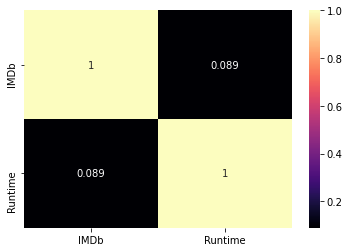

In [25]:
sns.heatmap(data_movies[['IMDb','Runtime']].corr(),cmap='magma',annot=True)
plt.show()

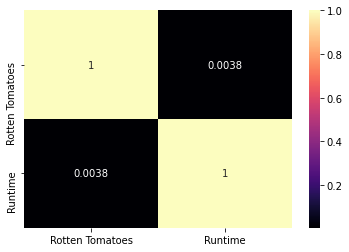

In [42]:
sns.heatmap(data_movies[['Rotten Tomatoes','Runtime']].corr(),cmap='magma',annot=True)
plt.show()

In [26]:
data_movies

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13,8.8,8.7,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18,8.7,8.7,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13,8.5,8.4,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7,8.5,9.6,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18,8.8,9.7,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16739,16739,16740,The Ghosts of Buxley Hall,1980,NaN,6.2,NaN,0,0,0,1,0,Bruce Bilson,"Comedy,Family,Fantasy,Horror",United States,English,120.0
16740,16740,16741,The Poof Point,2001,7,4.7,NaN,0,0,0,1,0,Neal Israel,"Comedy,Family,Sci-Fi",United States,English,90.0
16741,16741,16742,Sharks of Lost Island,2013,NaN,5.7,NaN,0,0,0,1,0,Neil Gelinas,Documentary,United States,English,NaN
16742,16742,16743,Man Among Cheetahs,2017,NaN,6.6,NaN,0,0,0,1,0,Richard Slater-Jones,Documentary,United States,English,NaN


## 30 Países com maiores Médias no Rotten Tomatoes

In [58]:
data_map = data_movies[['Rotten Tomatoes','Country']].sort_values(by='Rotten Tomatoes',ascending=False).head(30)
data_map

,Rotten Tomatoes,Country
481,10.0,"Germany,Australia"
828,10.0,United States
6507,10.0,Spain
5249,10.0,United States
3845,10.0,United States
433,10.0,India
5539,10.0,Israel
4662,10.0,United States
428,10.0,"United States,United Kingdom"
5534,10.0,"Australia,Japan"


In [60]:
data_movies.head(10)

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13,8.8,8.7,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18,8.7,8.7,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13,8.5,8.4,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7,8.5,9.6,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18,8.8,9.7,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0
5,5,6,Spider-Man: Into the Spider-Verse,2018,7,8.4,9.7,1,0,0,0,0,"Bob Persichetti,Peter Ramsey,Rodney Rothman","Animation,Action,Adventure,Family,Sci-Fi",United States,"English,Spanish",117.0
6,6,7,The Pianist,2002,18,8.5,9.5,1,0,1,0,0,Roman Polanski,"Biography,Drama,Music,War","United Kingdom,France,Poland,Germany","English,German,Russian",150.0
7,7,8,Django Unchained,2012,18,8.4,8.7,1,0,0,0,0,Quentin Tarantino,"Drama,Western",United States,"English,German,French,Italian",165.0
8,8,9,Raiders of the Lost Ark,1981,7,8.4,9.5,1,0,0,0,0,Steven Spielberg,"Action,Adventure",United States,"English,German,Hebrew,Spanish,Arabic,Nepali",115.0
9,9,10,Inglourious Basterds,2009,18,8.3,8.9,1,0,0,0,0,Quentin Tarantino,"Adventure,Drama,War","Germany,United States","English,German,French,Italian",153.0


In [44]:
countries =  for i in data_map

array(['13', '18', '7', nan, 'all', '16'], dtype=object)

# Funções

In [ ]:
def cleanAge(df):
    for i in range(len(data['Age'])):
        aux = df.loc[i,'Age']
        if aux != np.nan or aux != 'all' or aux != '':
            aux = str(aux)
            if '+' in aux:
                df.loc[i,'Age'] = aux.strip().split('+')[0]


In [ ]:
def cleanTomatoes(df):
    # o for é para tirar a %
    for i in range(len(df['Rotten Tomatoes'])):
        aux = df.loc[i,'Rotten Tomatoes']
        if aux != np.nan or aux != '':
            aux = str(aux)
            if '%' in aux:
                df.loc[i,'Rotten Tomatoes'] = aux.strip().split('%')[0]
    # divide o valor da nota do Rotten Tomatoes por 10, para ficar numa escala de 0 a 10
    df['Rotten Tomatoes'] = df['Rotten Tomatoes'].apply(lambda x: float(x)/10)